In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [103]:
busi_days = pd.read_csv("./data/Project2 business_day.csv", index_col=0)
busi_days = busi_days.loc[0:240, :]
busi_days.date = busi_days.date.astype("datetime64[ns]")
busi_days

,date
0,2019-01-03
1,2019-01-04
2,2019-01-07
3,2019-01-08
4,2019-01-09
...,...
236,2019-12-23
237,2019-12-24
238,2019-12-25
239,2019-12-26


In [114]:
close = pd.read_csv("./data/002027.SZ-2019.csv", index_col=0)
close.index = close.index.astype("datetime64[ns]")
close = close.loc[
    (close.index >= datetime.datetime(2019, 1, 3))
    & (close.index <= datetime.datetime(2019, 12, 27)),
    :,
]
close = close.reset_index()
close = pd.merge(busi_days, close, left_on="date", right_on="Date", how="left")
close = close.fillna(method="ffill")
close = close.Close
close

0      5.10
1      5.25
2      5.30
3      5.56
4      5.55
       ... 
236    6.08
237    6.33
238    6.42
239    6.36
240    6.24
Name: Close, Length: 241, dtype: float64

In [14]:
S0 = 5.1
up_barrier = S0 * 1.05
down_barrier = S0 * 0.68
R = 0.28
rf = 0.045
# q = 0.0196
q = 0.02875161161872558
Smax = S0 * 3
Smin = 0
Nt = 1000
Ns = 1000
# sigma = 0.2202
sigma = 0.4068869705985794

mc_count = 100000

In [15]:
from snow_ball.option.snow_ball import OptionSnowBall
from snow_ball.date_util import DateUtil, OptionDateCollection
from snow_ball.pricer import SnowBallPricer
from snow_ball.mc_3 import (
    delta_hedging_portfolio,
    delta_portfolio_return,
    simulation,
    snowball_cashflow,
)

T0 = datetime.datetime(2019, 1, 3)
T_start = datetime.datetime(2019, 1, 4)
T_right = datetime.datetime(2020, 1, 2)
Tn = datetime.datetime(2019, 12, 27)
date_util = DateUtil(OptionDateCollection(T0, T_start, Tn, T_right))
snow_ball = OptionSnowBall(R, up_barrier, down_barrier, date_util)
pricer = SnowBallPricer(snow_ball, rf, q, Smax, S0, Nt, Ns, sigma)

price_path = simulation(S0, rf, q, sigma, mc_count, False)
(
    payoff,
    payoff_present_value,
    knock_out_times,
    knock_in_times,
    existence_times,
    Tout,
) = snowball_cashflow(price_path, R, mc_count, 1, S0, rf)
portfolio = delta_hedging_portfolio(price_path, pricer)
portfolio_return = delta_portfolio_return(portfolio, price_path)

In [151]:
df = pd.DataFrame(
    {
        "sample_count": len(payoff),
        "mean": np.mean(payoff),
        "median": np.median(payoff),
        "std": np.std(payoff),
        "survival_time": np.mean(Tout)
    },
    index=[0],
)
df.to_excel('./result/MC_outcome.xlsx')
# len(payoff)

In [149]:
Tout

[28,
 28,
 28,
 28,
 231,
 59,
 203,
 84,
 28,
 59,
 59,
 112,
 322,
 28,
 147,
 28,
 28,
 28,
 28,
 59,
 59,
 28,
 28,
 203,
 28,
 28,
 28,
 259,
 84,
 84,
 112,
 28,
 28,
 175,
 28,
 59,
 28,
 112,
 203,
 59,
 112,
 203,
 28,
 203,
 175,
 28,
 28,
 231,
 84,
 84,
 28,
 28,
 28,
 28,
 28,
 28,
 147,
 59,
 28,
 147,
 84,
 28,
 84,
 28,
 28,
 28,
 203,
 112,
 28,
 84,
 147,
 28,
 112,
 59,
 28,
 84,
 147,
 322,
 59,
 28,
 28,
 28,
 28,
 28,
 59,
 28,
 147,
 112,
 294,
 203,
 28,
 84,
 28,
 147,
 59,
 28,
 28,
 84,
 28,
 112,
 28,
 112,
 84,
 28,
 84,
 322,
 112,
 28,
 28,
 28,
 59,
 147,
 59,
 28,
 59,
 59,
 28,
 59,
 28,
 28,
 28,
 28,
 203,
 112,
 28,
 59,
 28,
 28,
 28,
 28,
 59,
 84,
 84,
 28,
 59,
 28,
 84,
 59,
 28,
 28,
 28,
 28,
 147,
 28,
 28,
 84,
 28,
 59,
 259,
 147,
 59,
 231,
 203,
 59,
 59,
 28,
 28,
 259,
 28,
 28,
 84,
 84,
 28,
 28,
 28,
 231,
 84,
 28,
 28,
 59,
 28,
 259,
 28,
 84,
 84,
 28,
 84,
 84,
 175,
 84,
 59,
 147,
 59,
 294,
 84,
 28,
 28,
 84,
 322,
 84,
 2

bull shit

In [120]:
price_path[:, 0] = close.values
portfolio = delta_hedging_portfolio(price_path[:, 0:2], pricer)
portfolio_return = delta_portfolio_return(portfolio, price_path[:, 0:2])

/tmp/ipykernel_2159/1081225298.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


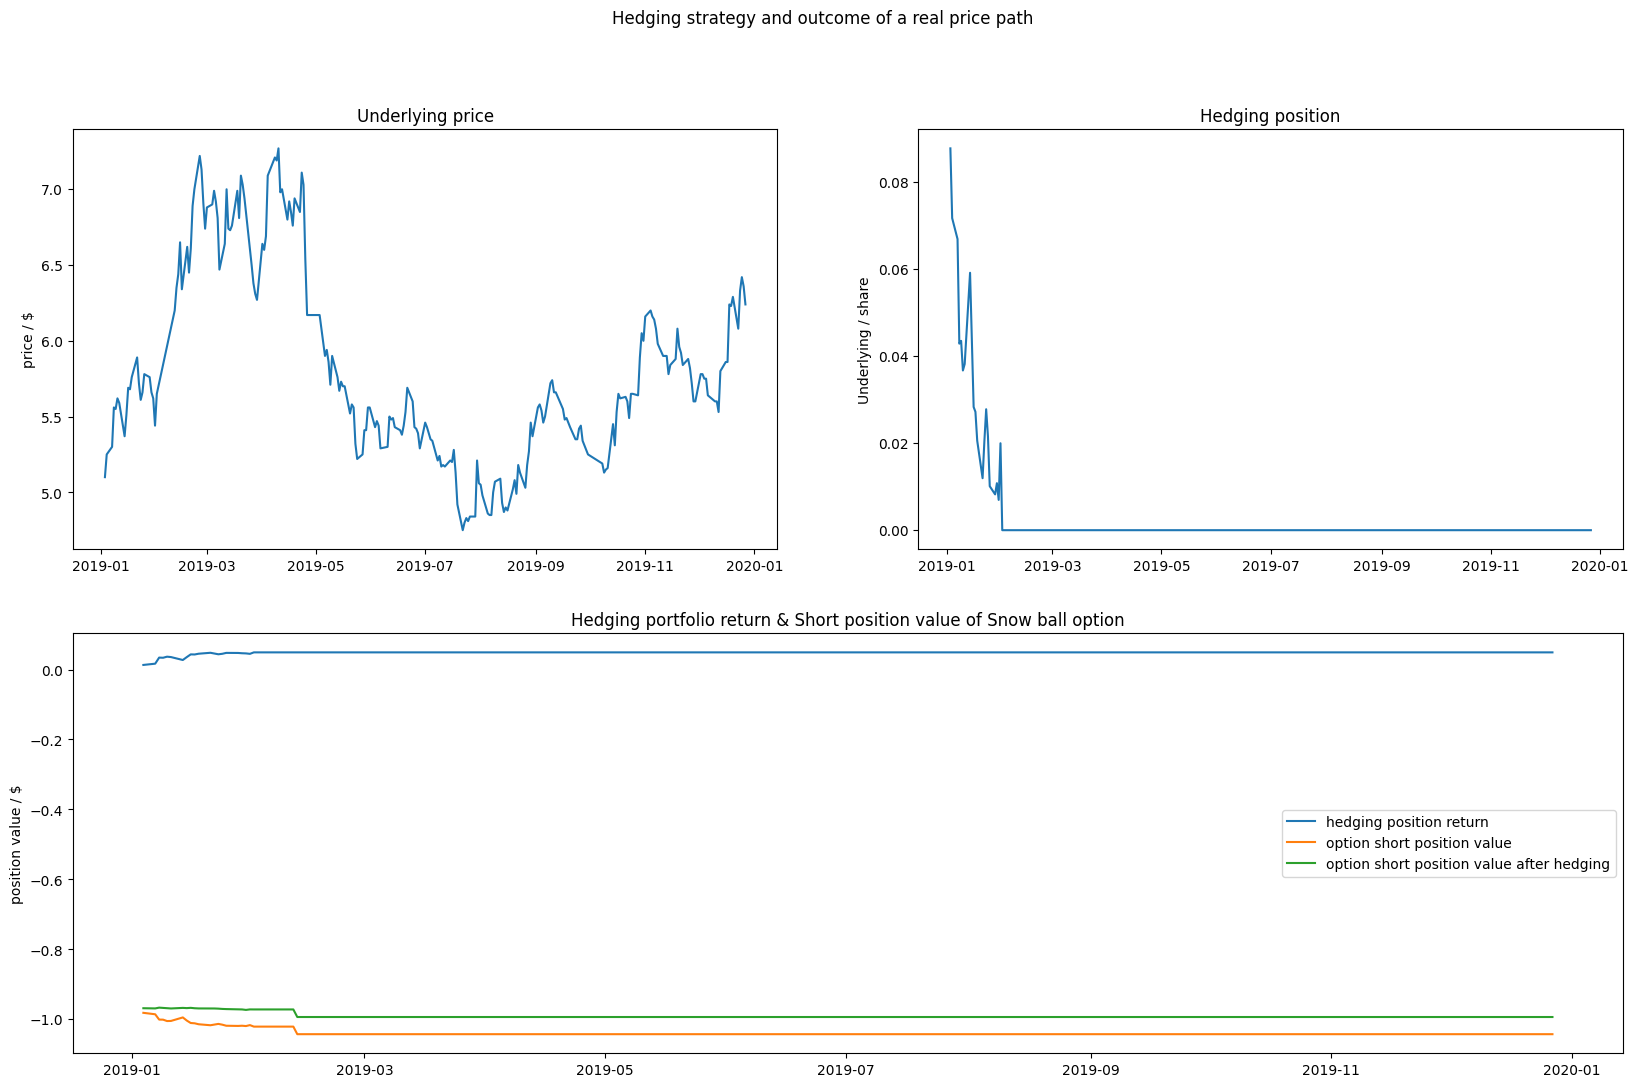

In [142]:
portfolio
portfolio_return
for col in range(0, 500):
    # if portfolio_return[col] + payoff[col] < 0:

    plt.figure(figsize=(20, 12))
    plt.title("xxxxx")
    plt.subplot(2, 2, 1)
    plt.plot(busi_days["date"].values, price_path[:, col])
    plt.ylabel("price / $")
    plt.title("Underlying price")

    plt.subplot(2, 2, 2)
    plt.plot(busi_days["date"].values, -portfolio[:, col])
    plt.ylabel("Underlying / share")
    plt.title("Hedging position")

    plt.subplot(2, 1, 2)
    plt.plot(
        busi_days.loc[1:, "date"],
        -np.add.accumulate(portfolio[:-1, col] * np.diff(price_path[:, col])),
        label="hedging position return",
    )

    short_pos_val = -np.array(
        [
            pricer.get_price_from_grid(pricer.grid_option_snow_ball, s, t)
            for s, t in zip(price_path[1:, col], range(240))
        ]
    )
    short_pos_val[22:] = short_pos_val[22]
    # print(short_pos_val[22])
    plt.plot(
        busi_days.loc[1:, "date"],
        short_pos_val,
        label="option short position value",
    )
    plt.plot(
        busi_days.loc[1:, "date"],
        short_pos_val
        - np.add.accumulate(portfolio[:-1, col] * np.diff(price_path[:, col])),
        label="option short position value after hedging",
    )
    plt.ylabel("position value / $")
    plt.legend()
    plt.title("Hedging portfolio return & Short position value of Snow ball option")
    plt.suptitle("Hedging strategy and outcome of a real price path")
    plt.show()
    break

In [23]:
pricer.get_snow_ball_price()

(0.969389711022292,
 [0.7901251638345481,
  0.041508671893174344,
  0.1658954917507708,
  0.028139616456201173])

In [24]:
0.1658954917507708 - 0.028139616456201173

0.13775587529456965

In [17]:
np.mean(payoff_present_value)

0.9589512954287202

11
0.9279554400788552
0.5247267893442744


/tmp/ipykernel_2159/4122656514.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


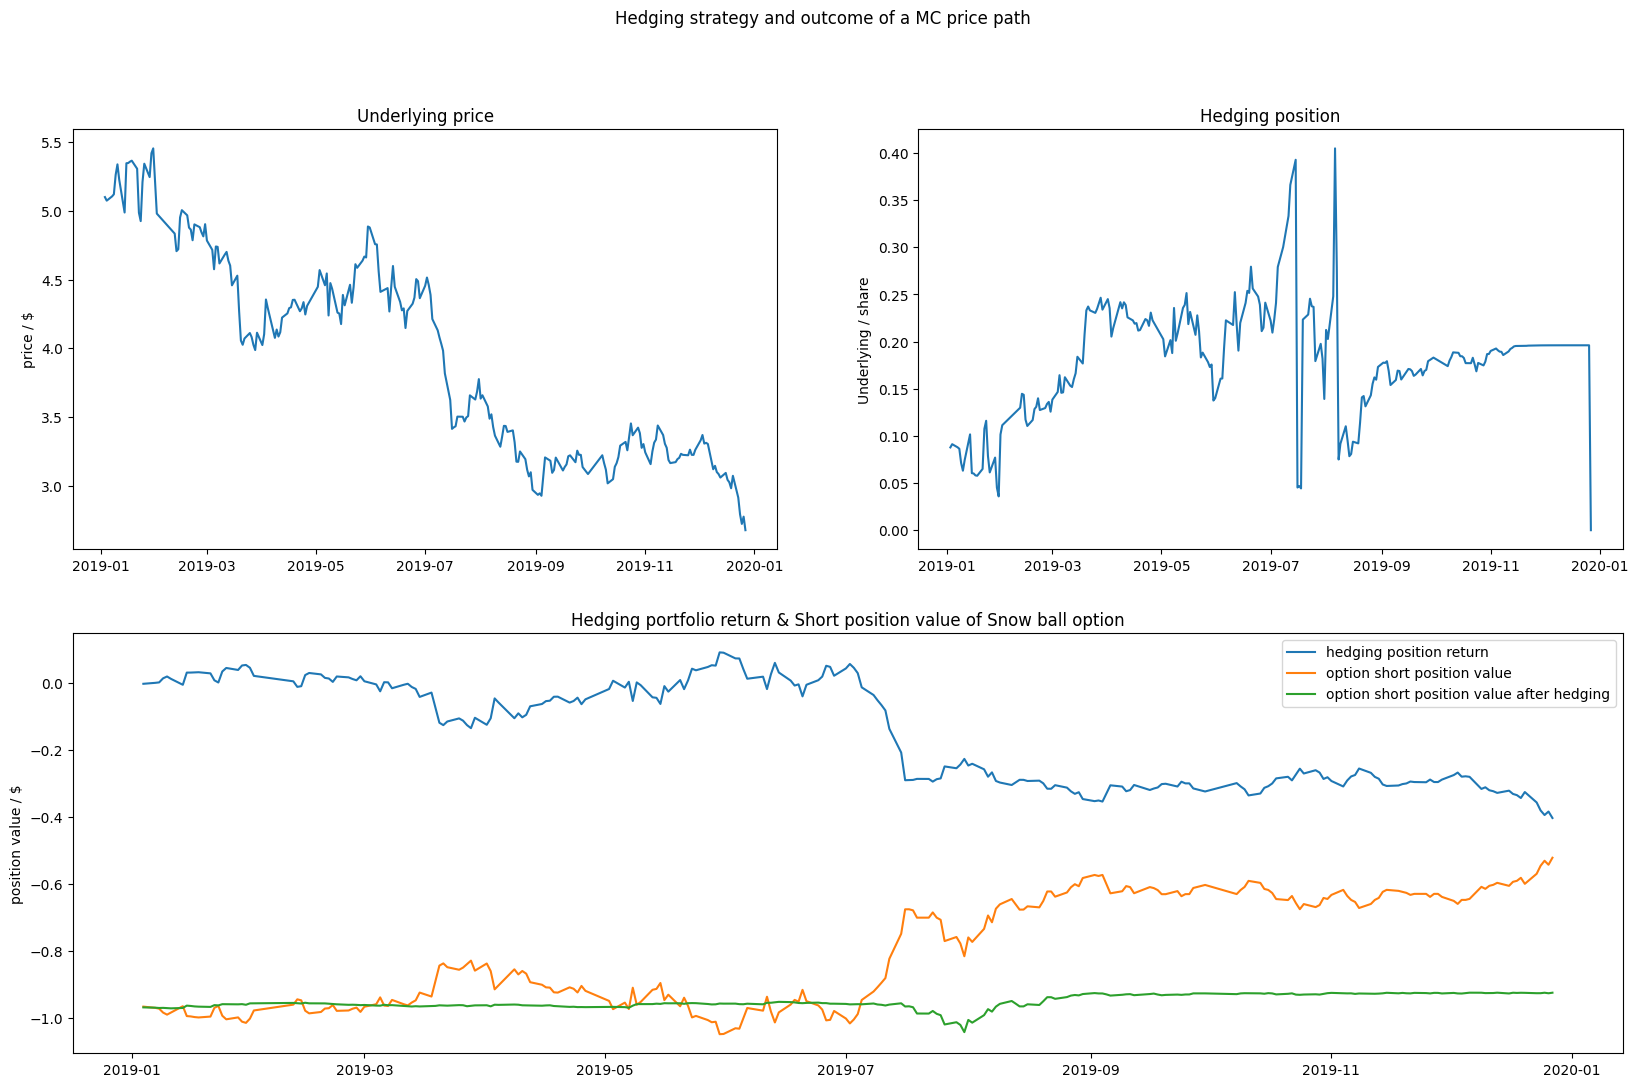

In [91]:
for col in range(10 + 1, 500):
    # if portfolio_return[col] + payoff[col] < 0:

    print(col)
    print(portfolio_return[col] + payoff[col])
    print(payoff[col])
    plt.figure(figsize=(20, 12))
    plt.title("xxxxx")
    plt.subplot(2, 2, 1)
    plt.plot(busi_days["date"].values, price_path[:, col])
    plt.ylabel("price / $")
    plt.title("Underlying price")

    plt.subplot(2, 2, 2)
    plt.plot(busi_days["date"].values, -portfolio[:, col])
    plt.ylabel("Underlying / share")
    plt.title("Hedging position")

    plt.subplot(2, 1, 2)
    plt.plot(
        busi_days.loc[1:, "date"],
        -np.add.accumulate(portfolio[:-1, col] * np.diff(price_path[:, col])),
        label="hedging position return",
    )
    plt.plot(
        busi_days.loc[1:, "date"],
        -np.array(
            [
                pricer.get_price_from_grid(pricer.grid_option_snow_ball, s, t)
                for s, t in zip(price_path[1:, col], range(240))
            ]
        ),
        label="option short position value",
    )
    plt.plot(
        busi_days.loc[1:, "date"],
        -np.array(
            [
                pricer.get_price_from_grid(pricer.grid_option_snow_ball, s, t)
                for s, t in zip(price_path[1:, col], range(240))
            ]
        )
        - np.add.accumulate(portfolio[:-1, col] * np.diff(price_path[:, col])),
        label="option short position value after hedging",
    )
    plt.ylabel("position value / $")
    plt.legend()
    plt.title("Hedging portfolio return & Short position value of Snow ball option")
    plt.suptitle("Hedging strategy and outcome of a MC price path")
    plt.show()
    break

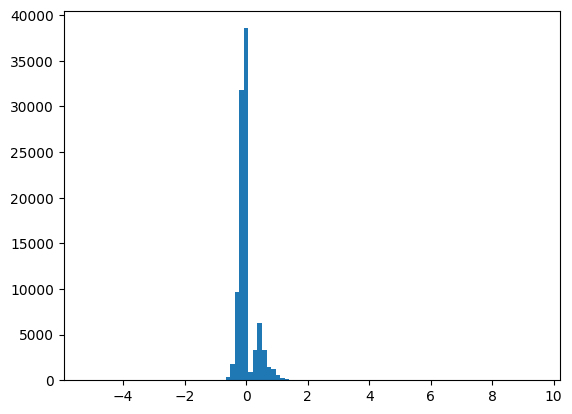

In [19]:
plt.hist(portfolio_return, bins=100)
plt.show()

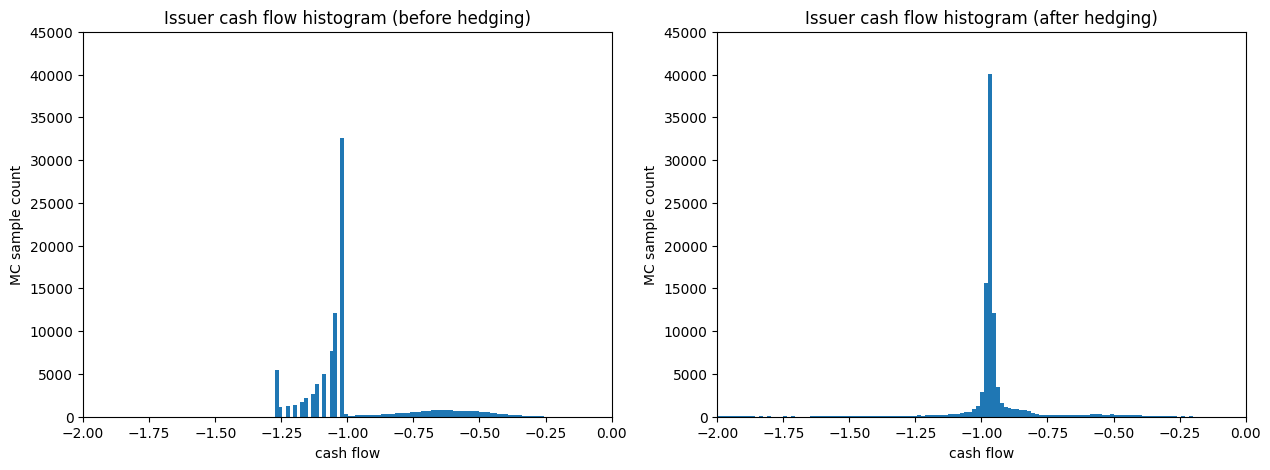

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(-payoff, bins=80)
plt.xlim((-2, 0))
plt.ylim((0, 45000))
plt.title(f"Issuer cash flow histogram (before hedging)")
plt.xlabel("cash flow")
plt.ylabel("MC sample count")

plt.subplot(1, 2, 2)
plt.hist(-payoff - portfolio_return, bins=1000)
plt.xlim((-2, 0))
plt.ylim((0, 45000))
plt.title(f"Issuer cash flow histogram (after hedging)")
plt.xlabel("cash flow")
plt.ylabel("MC sample count")
plt.show()

In [56]:
np.mean(payoff + portfolio_return)

0.9710902422679977

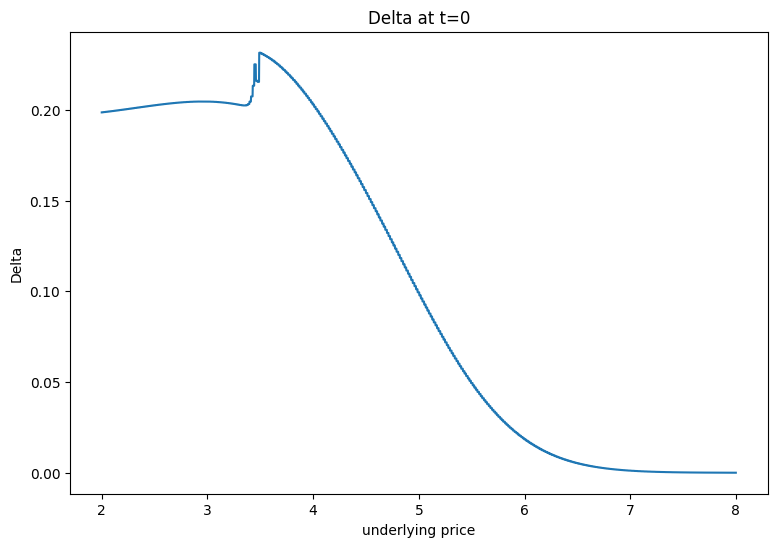

In [48]:
plt.figure(figsize=(9, 6))
plt.plot(
    np.arange(2, 8, 0.001),
    [pricer.get_snow_ball_delta(s, 0) for s in np.arange(2, 8, 0.001)],
)

plt.xlabel("underlying price")
plt.ylabel("Delta")
plt.title("Delta at t=0")
plt.show()